# Import


In [4]:
# from google.colab import drive
# drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
# %cd /content/drive/MyDrive/proyek/PKM-etong
# %cd ./PENDANAAN/Data Sensor
# %ls

/content/drive/MyDrive/proyek/PKM-etong
/content/drive/MyDrive/proyek/PKM-etong/PENDANAAN/Data Sensor
akuades.csv               kalsiumpoly_reg_6.joblib     pca-050923.csv
Asam/                     kalsium_poly_reg_7.joblib    pca-week2.csv
Asin/                     kalsiumpoly_reg_7.joblib     timbalpoly_reg_6.joblib
Baru/                     magnesiumpoly_reg_6.joblib   timbal_poly_reg_7.joblib
data_uji_050923.csv       magnesium_poly_reg_7.joblib  timbalpoly_reg_7.joblib
decision_tree.png         magnesiumpoly_reg_7.joblib   Umami/
dtree_080923.joblib       metrics.csv                  week2_pengulangan_concat.csv
kaliumpoly_reg_6.joblib   metrics.gsheet               week2_pengulangan_mean.csv
kalium_poly_reg_7.joblib  mineral.csv                  week3_pengulangan_concat.csv
kaliumpoly_reg_7.joblib   Pahit/


In [ ]:
import requests
def get_df(name):
  web = 'https://raw.githubusercontent.com/'
  repo = 'kaylaque/etongue/main'
  url = web + repo + name
  response = requests.get(url)
  with open(name, 'wb') as f:
      f.write(response.content)

  return(pd.read_csv(name))

In [6]:
import pandas as pd
df = get_df('/data_uji_050923.csv')
# df_ak = pd.read_csv('./akuades.csv', index_col = False)
# df_min = pd.read_csv('./mineral.csv', index_col = False)
# df_tes = pd.concat([df_ak, df_min])
df = df.drop('Unnamed: 0', axis = 1)
# df_tes = df_tes.drop('Unnamed: 0', axis = 1)

In [7]:
df['sensor-type'].value_counts()

umami    15600
asin     15600
pahit    15600
asam     15600
Name: sensor-type, dtype: int64

In [8]:
df.head()

tag  time (s)    S1    S2    S3 sensor-type   label
0   30       1.0 -60.0 -60.0 -62.0       umami  kalium
1   30       2.0 -60.0 -60.0 -62.0       umami  kalium
2   30       3.0 -60.0 -60.0 -62.0       umami  kalium
3   30       4.0 -60.0 -60.0 -62.0       umami  kalium
4   30       5.0 -60.0 -60.0 -62.0       umami  kalium

In [9]:
# df_tes['sensor-type'].value_counts()

umami    360
asin     360
pahit    360
asam     360
Name: sensor-type, dtype: int64

In [10]:
# preprop['label'].value_counts()

In [11]:
s1_asin = []
for label in df['label'].unique().tolist():
  s1_asin.extend(df[(df['sensor-type'] == 'asin') & (df['label'] == label)]['S3'].tolist())
len(s1_asin)

15600

In [12]:
df[df.isna().any(axis=1)]

tag  time (s)  S1  S2  S3 sensor-type      label
6120   10       1.0 NaN NaN NaN        asin  magnesium
6121   10       2.0 NaN NaN NaN        asin  magnesium
6122   10       3.0 NaN NaN NaN        asin  magnesium
6123   10       4.0 NaN NaN NaN        asin  magnesium
6124   10       5.0 NaN NaN NaN        asin  magnesium
...   ...       ...  ..  ..  ..         ...        ...
6295   10      56.0 NaN NaN NaN        asin  magnesium
6296   10      57.0 NaN NaN NaN        asin  magnesium
6297   10      58.0 NaN NaN NaN        asin  magnesium
6298   10      59.0 NaN NaN NaN        asin  magnesium
6299   10      60.0 NaN NaN NaN        asin  magnesium

[180 rows x 7 columns]

In [13]:
df[(df['sensor-type'] == 'asin') & (df['label'] == 'magnesium') & (df['tag'] == 10)]

tag  time (s)    S1    S2    S3 sensor-type      label
6120    10       1.0   NaN   NaN   NaN        asin  magnesium
6121    10       2.0   NaN   NaN   NaN        asin  magnesium
6122    10       3.0   NaN   NaN   NaN        asin  magnesium
6123    10       4.0   NaN   NaN   NaN        asin  magnesium
6124    10       5.0   NaN   NaN   NaN        asin  magnesium
...    ...       ...   ...   ...   ...         ...        ...
33595   10      56.0 -66.0 -64.0 -64.0        asin  magnesium
33596   10      57.0 -66.0 -66.0 -64.0        asin  magnesium
33597   10      58.0 -66.0 -68.0 -64.0        asin  magnesium
33598   10      59.0 -64.0 -66.0 -64.0        asin  magnesium
33599   10      60.0 -64.0 -64.0 -64.0        asin  magnesium

[780 rows x 7 columns]

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62400 entries, 0 to 62399
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   tag          62400 non-null  int64  
 1   time (s)     62400 non-null  float64
 2   S1           62220 non-null  float64
 3   S2           62220 non-null  float64
 4   S3           62220 non-null  float64
 5   sensor-type  62400 non-null  object 
 6   label        62400 non-null  object 
dtypes: float64(4), int64(1), object(2)
memory usage: 3.3+ MB


In [ ]:
preprop = pd.DataFrame()
num_sensor = ['S1', 'S2', 'S3']
labels = []

for label in df['label'].unique().tolist():
    label_df = pd.DataFrame()  # Create a new DataFrame for each label
    print(label)
    for t in df['sensor-type'].unique().tolist():
        print(t)
        for s in num_sensor:
            print(s)
            name = s + '_' + t
            label_df[name] = df[(df['sensor-type'] == t) & (df['label'] == label)][s].tolist()
            print(len(label_df))
    # Append the label DataFrame to preprop
    preprop = preprop.append(label_df, ignore_index=True)
    labels.extend([label] * len(label_df))

preprop['label'] = labels

In [19]:
# Drop all NaN rows
preprop = preprop.dropna()

#PCA

In [20]:
from sklearn.decomposition import PCA
X = preprop.drop('label', axis = 1)
pca = PCA(n_components=1)
pca.fit(X)
X_pca = pca.transform(X)
print("original shape:   ", X.shape)
print("transformed shape:", X_pca.shape)

original shape:    (15420, 12)
transformed shape: (15420, 1)


(-65.70692963136959,
 -62.98355241496476,
 -65.38156745573534,
 -63.11176819499582)

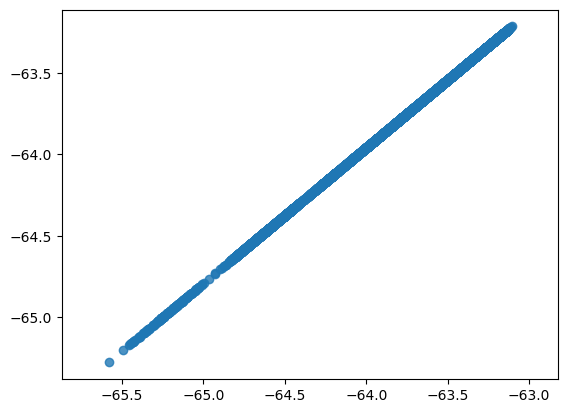

In [21]:
import matplotlib.pyplot as plt

X_new = pca.inverse_transform(X_pca)
# plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.8)
plt.axis('equal')

In [22]:
preprop['label'].unique()

array(['kalium', 'kalsium', 'magnesium', 'timbal'], dtype=object)

In [23]:
preprop['label'] = pd.Categorical(preprop['label'])
preprop['label']

0        kalium
1        kalium
2        kalium
3        kalium
4        kalium
          ...  
15595    timbal
15596    timbal
15597    timbal
15598    timbal
15599    timbal
Name: label, Length: 15420, dtype: category
Categories (4, object): ['kalium', 'kalsium', 'magnesium', 'timbal']

(15420, 13)
(15420, 2)


<ipython-input-24-ef6711a2204d>:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=plt.cm.get_cmap('Accent', 4))


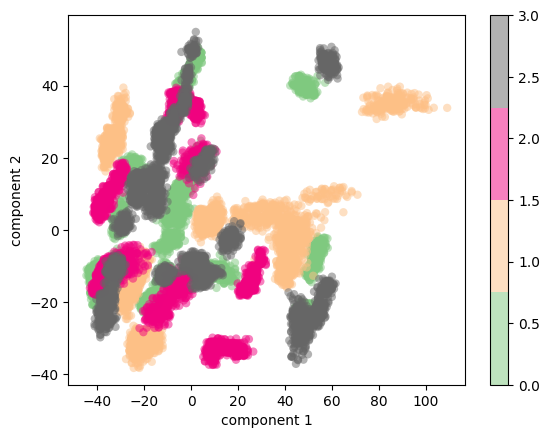

In [24]:
pca = PCA(2)  # project from 64 to 2 dimensions
projected = pca.fit_transform(X)
print(preprop.shape)
print(projected.shape)
plt.scatter(projected[:, 0], projected[:, 1],
            c=preprop['label'].cat.codes, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('Accent', 4))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar()

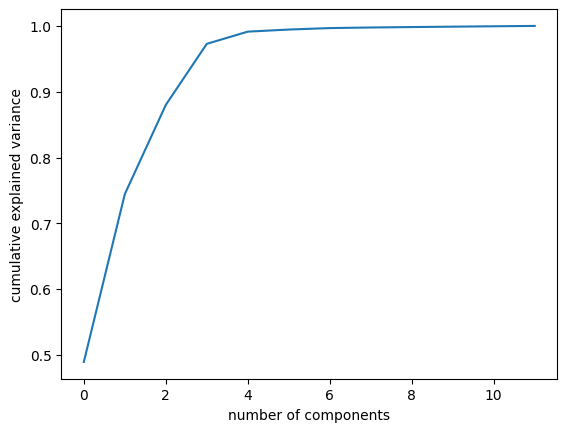

In [25]:
import numpy as np
pca = PCA().fit(X)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [67]:
X

S1_umami  S2_umami  S3_umami  S1_asin  S2_asin  S3_asin  S1_pahit  \
0         -60.0     -60.0     -62.0    -90.0    -90.0    -90.0     -28.0   
1         -60.0     -60.0     -62.0    -88.0    -88.0    -90.0     -28.0   
2         -60.0     -60.0     -62.0    -84.0    -84.0    -90.0     -26.0   
3         -60.0     -60.0     -62.0    -86.0    -88.0    -90.0     -30.0   
4         -60.0     -60.0     -62.0    -86.0    -88.0    -90.0     -22.0   
...         ...       ...       ...      ...      ...      ...       ...   
15595     -80.0     -82.0     -82.0    -62.0    -62.0    -60.0     -24.0   
15596     -80.0     -78.0     -80.0    -62.0    -64.0    -62.0     -24.0   
15597     -80.0     -80.0     -80.0    -62.0    -62.0    -62.0     -24.0   
15598     -80.0     -76.0     -76.0    -62.0    -64.0    -64.0     -24.0   
15599     -80.0     -76.0     -74.0    -62.0    -64.0    -64.0     -24.0   

       S2_pahit  S3_pahit  S1_asam  S2_asam  S3_asam  
0         -28.0      -2.0    -66.0    -66.0    -72.0  
1         -28.0      -2.0    -66.0    -66.0    -72.0  
2         -26.0      -2.0    -64.0    -64.0    -72.0  
3         -30.0      -2.0    -64.0    -64.0    -72.0  
4         -22.0      -2.0    -66.0    -64.0    -72.0  
...         ...       ...      ...      ...      ...  
15595     -26.0     -26.0    -56.0    -56.0    -56.0  
15596     -26.0     -26.0    -56.0    -56.0    -56.0  
15597     -24.0     -26.0    -56.0    -56.0    -56.0  
15598     -26.0     -26.0    -56.0    -56.0    -56.0  
15599     -26.0     -26.0    -56.0    -56.0    -56.0  

[15420 rows x 12 columns]

In [68]:
pca = PCA(3)  # project from 64 to 2 dimensions
projected = pca.fit_transform(X)
print(preprop.shape)
print(projected.shape)

(15420, 13)
(15420, 3)


In [69]:
projected

array([[ -5.21849011,   5.13694028, -23.14361672],
       [ -3.4982441 ,   5.26698297, -21.73271227],
       [  1.40351524,   5.83205074, -20.30648924],
       ...,
       [ 45.28089795, -27.75798857,  -2.3863215 ],
       [ 43.42966   , -23.6109068 ,  -4.45333897],
       [ 43.39652892, -22.48731232,  -4.54377534]])

<ipython-input-41-72a4e7b49c10>:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=plt.cm.get_cmap('Accent', 4))


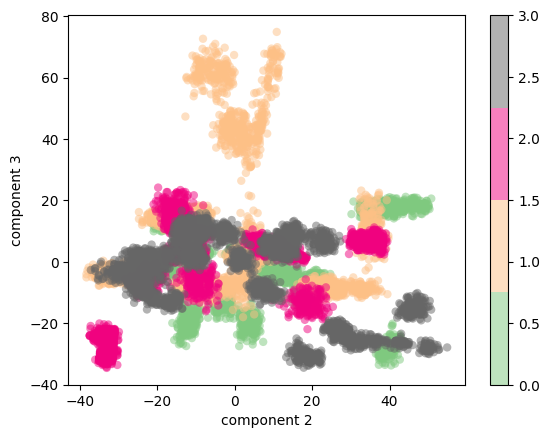

In [41]:
plt.scatter(projected[:, 1], projected[:, 2],
            c=preprop['label'].cat.codes, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('Accent', 4))
plt.xlabel('component 2')
plt.ylabel('component 3')
plt.colorbar()

<ipython-input-43-d3f7ad9771ea>:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=plt.cm.get_cmap('Accent', 4))


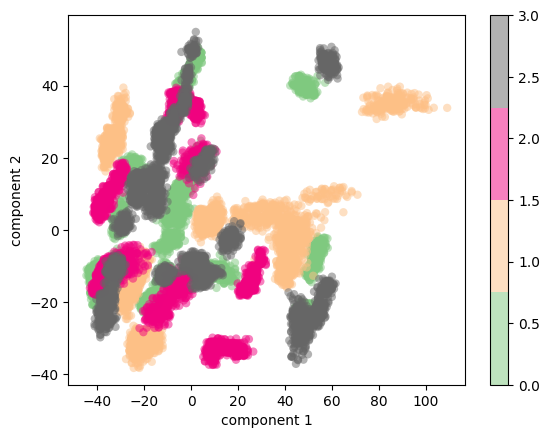

In [43]:
plt.scatter(projected[:, 0], projected[:, 1],
            c=preprop['label'].cat.codes, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('Accent', 4))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar()

<ipython-input-44-cd3d32e9d37c>:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=plt.cm.get_cmap('Accent', 4))


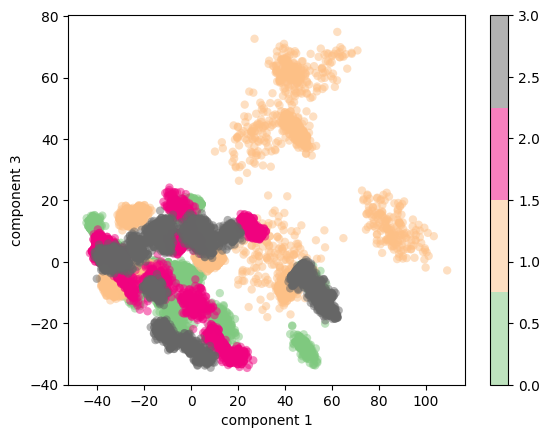

In [44]:
plt.scatter(projected[:, 0], projected[:, 2],
            c=preprop['label'].cat.codes, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('Accent', 4))
plt.xlabel('component 1')
plt.ylabel('component 3')
plt.colorbar()

In [70]:
pcad = pd.DataFrame(projected, columns=['comp1', 'comp2', 'comp3'])
pcad.to_csv('pca-050923.csv')

In [73]:
pcad

comp1      comp2      comp3
0      -5.218490   5.136940 -23.143617
1      -3.498244   5.266983 -21.732712
2       1.403515   5.832051 -20.306489
3      -1.034213   4.877900 -23.114794
4      -2.086139   6.412163 -20.860020
...          ...        ...        ...
15415  46.285633 -30.099829  -1.561024
15416  44.430091 -26.886103  -3.361901
15417  45.280898 -27.757989  -2.386321
15418  43.429660 -23.610907  -4.453339
15419  43.396529 -22.487312  -4.543775

[15420 rows x 3 columns]

In [34]:
import scipy.stats as stats
from scipy.stats import chi2
import numpy as np
def cramers(df, non):
  contingency_table = pd.crosstab(df[non], df['label'])
  # Calculate the total number of observations
  total_observations = np.sum(contingency_table)

  # Calculate the expected frequencies
  expected_frequencies = total_observations * (contingency_table / total_observations)

  # Calculate the chi-squared statistic
  chi2_statistic = np.sum((contingency_table - expected_frequencies)**2 / expected_frequencies)

  # Calculate the p-value
  p_value = chi2.sf(chi2_statistic, df=(contingency_table.shape[0] - 1) * (contingency_table.shape[1] - 1))


  # Calculate Cramer's V
  cramers_v = np.sqrt(chi2_statistic / (contingency_table.size - 1) * (contingency_table.shape[0] - 1) * (contingency_table.shape[1] - 1))


  # Print the result
  return(cramers_v)

In [ ]:
# pd.preprop[[non, 'label']].to_numpy()

In [49]:
non_target = preprop.columns[:-2].tolist()
kalium = []
kalsium = []
magnesium = []
timbal = []
classes = []
for non in non_target:
  cram = cramers(preprop[[non, 'label']], non)
  kalium.append(cram[0])
  kalsium.append(cram[1])
  magnesium.append(cram[2])
  timbal.append(cram[3])
  classes.append(non)

<ipython-input-34-afe7fcbde47e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  contingency_table = pd.crosstab(df[non], df['label'])


In [50]:
# kalium, kalsium, magnesium,
len(magnesium) == len(classes)

True

In [51]:
corr = pd.DataFrame(columns = ['kalium', 'kalsium', 'magnesium', 'timbal'])
corr['kalium'] =  kalium
corr['kalsium'] = kalsium
corr['magnesium'] = magnesium
corr['timbal'] = timbal
corr.index=classes

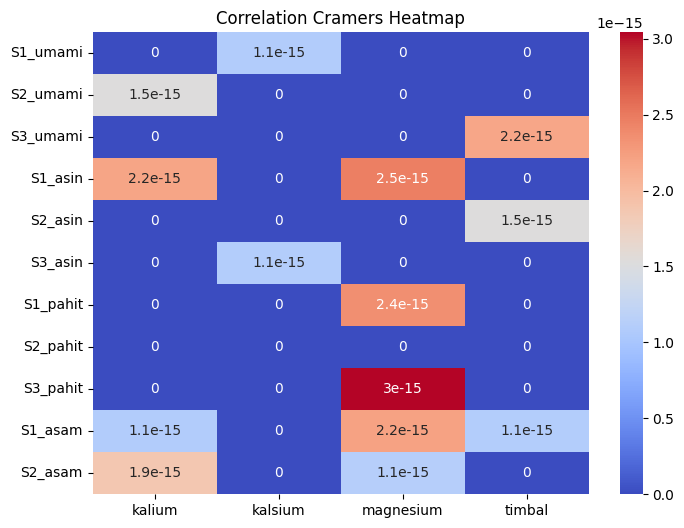

In [52]:
# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=0, vmax=np.max(corr.max()))
plt.title(f'Correlation Cramers Heatmap')
plt.show()

# Modelling Classification


### decision tree

In [102]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split


def data_split(X, target):
  # label encoding
  le = LabelEncoder()
  y = le.fit_transform(target)
  print(y)
  print(X.head())
  # Splitting the data - 80:20 ratio
  X_train, X_test, y_train, y_test = train_test_split(X , y, test_size = 0.2, random_state = 42, stratify=preprop['label'])
  print("Training split input- ", X_train.shape)
  print("Testing split input- ", X_test.shape)
  return(X_train, X_test, y_train, y_test)

In [ ]:
# preprop['label_enc'] = y.tolist()

In [106]:
# Defining the decision tree algorithmdtree=DecisionTreeClassifier()
import numpy as np
from sklearn.tree import DecisionTreeClassifier

# Predicting the values of test data
from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


def train_DT(X_train, X_test, y_train, y_test):
  dtree = DecisionTreeClassifier()
  dtree.fit(X_train, y_train)
  print('Decision Tree Classifier Created')
  y_pred = dtree.predict(X_test)
  print("Classification report - \n", classification_report(y_test,y_pred))
  print(dtree.score(X_test, y_test)*100)

  cm = confusion_matrix(y_test, y_pred)
  # Calculate the confusion matrix in percentage
  cm_percent = cm / np.sum(cm) * 100

  plt.figure(figsize=(5,5))
  sns.heatmap(data=cm_percent,linewidths=.5, annot=True,square = True,  cmap = 'Blues')
  plt.ylabel('Actual label')
  plt.xlabel('Predicted label')
  all_sample_title = 'Confusion Matrix in Percentage with Accuracy Score: {0}'.format(dtree.score(X_test, y_test))
  plt.title(all_sample_title, size = 8)
  # plt.subtitle
  return(dtree)

In [111]:
from sklearn.tree import plot_tree

def viz(dtree, X, title):
  # Visualising the graph without the use of graphviz
  plt.figure(figsize = (100,100))
  dec_tree = plot_tree(decision_tree=dtree, feature_names = X.columns,
                      class_names =preprop['label'].unique().tolist(), filled = True , precision = 4, rounded = True)
  # Save the figure to a file (e.g., as a PNG image)
  plt.savefig(f"decision_tree_{title}.png")

[0 0 0 ... 3 3 3]
   S1_umami  S2_umami  S3_umami  S1_asin  S2_asin  S3_asin  S1_pahit  \
0     -60.0     -60.0     -62.0    -90.0    -90.0    -90.0     -28.0   
1     -60.0     -60.0     -62.0    -88.0    -88.0    -90.0     -28.0   
2     -60.0     -60.0     -62.0    -84.0    -84.0    -90.0     -26.0   
3     -60.0     -60.0     -62.0    -86.0    -88.0    -90.0     -30.0   
4     -60.0     -60.0     -62.0    -86.0    -88.0    -90.0     -22.0   

   S2_pahit  S3_pahit  S1_asam  S2_asam  S3_asam  
0     -28.0      -2.0    -66.0    -66.0    -72.0  
1     -28.0      -2.0    -66.0    -66.0    -72.0  
2     -26.0      -2.0    -64.0    -64.0    -72.0  
3     -30.0      -2.0    -64.0    -64.0    -72.0  
4     -22.0      -2.0    -66.0    -64.0    -72.0  
Training split input-  (12336, 12)
Testing split input-  (3084, 12)
Decision Tree Classifier Created
Classification report - 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       780
       

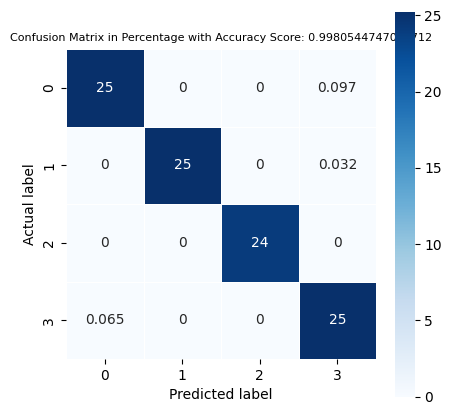

In [116]:
target = preprop['label']
X = preprop.drop(['label'], axis = 1)
X_train, X_test, y_train, y_test = data_split(X, target)
model = train_DT(X_train, X_test, y_train, y_test)
viz(model, X_test, 'AI-preprop')

In [117]:
features = pd.DataFrame()
features['columns'] = X.columns.tolist()
features['importance'] = model.feature_importances_
features

columns  importance
0   S1_umami    0.094682
1   S2_umami    0.000192
2   S3_umami    0.091695
3    S1_asin    0.160525
4    S2_asin    0.035063
5    S3_asin    0.063226
6   S1_pahit    0.093322
7   S2_pahit    0.004579
8   S3_pahit    0.187716
9    S1_asam    0.215327
10   S2_asam    0.000186
11   S3_asam    0.053487

from matplotlib import pyplot as plt
_df_0['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['importance'].plot(kind='hist', bins=20, title='importance')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2.plot(kind='scatter', x='index', y='importance', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['importance']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_3.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('importance')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_4.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_5['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_6['importance'].plot(kind='line', figsize=(8, 4), title='importance')
plt.gca().spines[['top', 'right']].set_visible(False)

[0 0 0 ... 3 3 3]
      comp1     comp2      comp3
0 -5.218490  5.136940 -23.143617
1 -3.498244  5.266983 -21.732712
2  1.403515  5.832051 -20.306489
3 -1.034213  4.877900 -23.114794
4 -2.086139  6.412163 -20.860020
Training split input-  (12336, 3)
Testing split input-  (3084, 3)
Decision Tree Classifier Created
Classification report - 
               precision    recall  f1-score   support

           0       0.97      0.96      0.96       780
           1       1.00      1.00      1.00       780
           2       0.97      0.98      0.98       744
           3       0.96      0.96      0.96       780

    accuracy                           0.97      3084
   macro avg       0.97      0.97      0.97      3084
weighted avg       0.97      0.97      0.97      3084

97.43839169909208


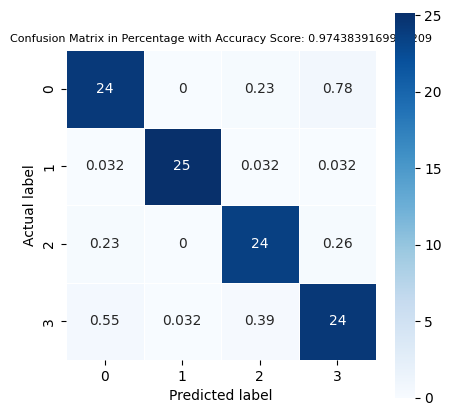

In [120]:
target = preprop['label']
X = pcad
X_train, X_test, y_train, y_test = data_split(X, target)
model = train_DT(X_train, X_test, y_train, y_test)
viz(model, X_test, 'AI-pcad')

In [115]:
features = pd.DataFrame()
features['columns'] = X.columns.tolist()
features['importance'] = model.feature_importances_
features

columns  importance
0   comp1    0.339378
1   comp2    0.390129
2   comp3    0.270493

In [95]:
# import pickle
# X_trial = preprop_tes.drop(['label'], axis = 1)
# s = pickle.dumps(dtree)
# dtree2 = pickle.loads(s)
# res = dtree2.predict(X_trial)
# len(res)

360

In [ ]:
# from joblib import dump, load
# dump(dtree, 'dtree_080923.joblib')
# dtree2 = load('dtree_080923.joblib')
# res = dtree2.predict(X_trial)
# len(res)

360

### XGBoost

In [152]:
def train_XGB(X_train, X_test, y_train, y_test):
  model = XGBClassifier()
  model.fit(X_train, y_train)
  print('XGBoost Classifier Created')
  y_pred = model.predict(X_test)
  print("Classification report - \n", classification_report(y_test,y_pred))
  print(model.score(X_test, y_test)*100)

  cm = confusion_matrix(y_test, y_pred)
  # Calculate the confusion matrix in percentage
  cm_percent = cm / np.sum(cm) * 100

  plt.figure(figsize=(5,5))
  sns.heatmap(data=cm_percent,linewidths=.5, annot=True,square = True,  cmap = 'Blues')
  plt.ylabel('Actual label')
  plt.xlabel('Predicted label')
  all_sample_title = 'Confusion Matrix in Percentage with Accuracy Score: {0}'.format(model.score(X_test, y_test))
  plt.title(all_sample_title, size = 8)
  # plt.subtitle
  return(model)

[0 0 0 ... 3 3 3]
   S1_umami  S2_umami  S3_umami  S1_asin  S2_asin  S3_asin  S1_pahit  \
0     -60.0     -60.0     -62.0    -90.0    -90.0    -90.0     -28.0   
1     -60.0     -60.0     -62.0    -88.0    -88.0    -90.0     -28.0   
2     -60.0     -60.0     -62.0    -84.0    -84.0    -90.0     -26.0   
3     -60.0     -60.0     -62.0    -86.0    -88.0    -90.0     -30.0   
4     -60.0     -60.0     -62.0    -86.0    -88.0    -90.0     -22.0   

   S2_pahit  S3_pahit  S1_asam  S2_asam  S3_asam  
0     -28.0      -2.0    -66.0    -66.0    -72.0  
1     -28.0      -2.0    -66.0    -66.0    -72.0  
2     -26.0      -2.0    -64.0    -64.0    -72.0  
3     -30.0      -2.0    -64.0    -64.0    -72.0  
4     -22.0      -2.0    -66.0    -64.0    -72.0  
Training split input-  (12336, 12)
Testing split input-  (3084, 12)
XGBoost Classifier Created
Classification report - 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       780
           1 

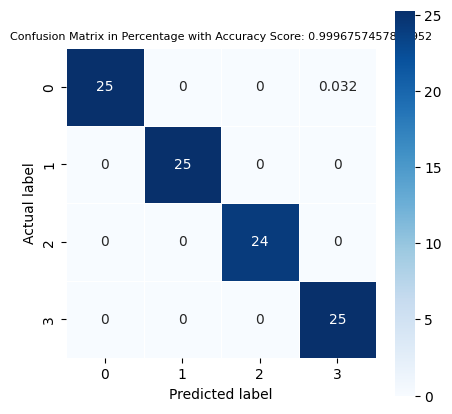

In [153]:
from xgboost import XGBClassifier
target = preprop['label']
X = preprop.drop(['label'], axis = 1)
X_train, X_test, y_train, y_test = data_split(X, target)
model = train_XGB(X_train, X_test, y_train, y_test)

In [154]:
features = pd.DataFrame()
features['columns'] = X.columns.tolist()
features['importance'] = model.feature_importances_
features

columns  importance
0   S1_umami    0.107784
1   S2_umami    0.019565
2   S3_umami    0.062797
3    S1_asin    0.147082
4    S2_asin    0.041542
5    S3_asin    0.054061
6   S1_pahit    0.099960
7   S2_pahit    0.165064
8   S3_pahit    0.109230
9    S1_asam    0.109404
10   S2_asam    0.009823
11   S3_asam    0.073688

[0 0 0 ... 3 3 3]
      comp1     comp2      comp3
0 -5.218490  5.136940 -23.143617
1 -3.498244  5.266983 -21.732712
2  1.403515  5.832051 -20.306489
3 -1.034213  4.877900 -23.114794
4 -2.086139  6.412163 -20.860020
Training split input-  (12336, 3)
Testing split input-  (3084, 3)
Decision Tree Classifier Created
Classification report - 
               precision    recall  f1-score   support

           0       0.97      0.99      0.98       780
           1       1.00      1.00      1.00       780
           2       0.98      0.98      0.98       744
           3       0.99      0.96      0.97       780

    accuracy                           0.98      3084
   macro avg       0.98      0.98      0.98      3084
weighted avg       0.98      0.98      0.98      3084

98.24902723735408


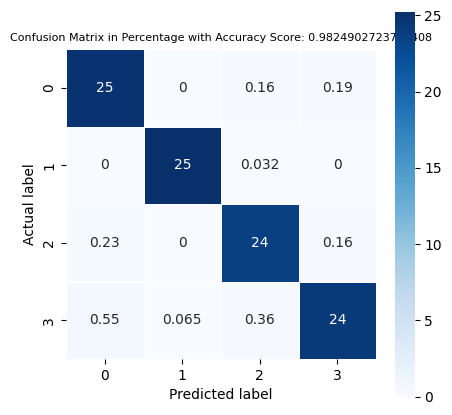

In [123]:
target = preprop['label']
X = pcad
X_train, X_test, y_train, y_test = data_split(X, target)
model = train_XGB(X_train, X_test, y_train, y_test)

In [124]:
features = pd.DataFrame()
features['columns'] = X.columns.tolist()
features['importance'] = model.feature_importances_
features

columns  importance
0   comp1    0.338916
1   comp2    0.340002
2   comp3    0.321082

### Clustering

In [129]:
# k-means clustering
from numpy import unique
from numpy import where

from sklearn.cluster import KMeans
from matplotlib import pyplot


In [132]:
y_test

array([1, 3, 0, ..., 1, 1, 2])

In [139]:
def train_kmeans(X,y):
  # define the model
  model = KMeans(n_clusters=4)
  # fit the model
  model.fit(X)
  # assign a cluster to each example
  yhat = model.predict(X)
  # retrieve unique clusters
  clusters = unique(yhat)
  print("Classification report - \n", classification_report(y,yhat))

  cm = confusion_matrix(y,yhat)
  # Calculate the confusion matrix in percentage
  cm_percent = cm / np.sum(cm) * 100

  plt.figure(figsize=(5,5))
  sns.heatmap(data=cm_percent,linewidths=.5, annot=True,square = True,  cmap = 'Blues')
  plt.ylabel('Actual label')
  plt.xlabel('Predicted label')
  all_sample_title = 'Confusion Matrix in K-Means Clustering'
  plt.title(all_sample_title, size = 8)
  # plt.subtitle
  return(model, yhat, clusters)

[0 0 0 ... 3 3 3]
      comp1     comp2      comp3
0 -5.218490  5.136940 -23.143617
1 -3.498244  5.266983 -21.732712
2  1.403515  5.832051 -20.306489
3 -1.034213  4.877900 -23.114794
4 -2.086139  6.412163 -20.860020


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Classification report - 
               precision    recall  f1-score   support

           0       0.31      0.42      0.36      3900
           1       0.23      0.31      0.26      3900
           2       0.00      0.00      0.00      3720
           3       0.23      0.27      0.25      3900

    accuracy                           0.25     15420
   macro avg       0.19      0.25      0.22     15420
weighted avg       0.20      0.25      0.22     15420



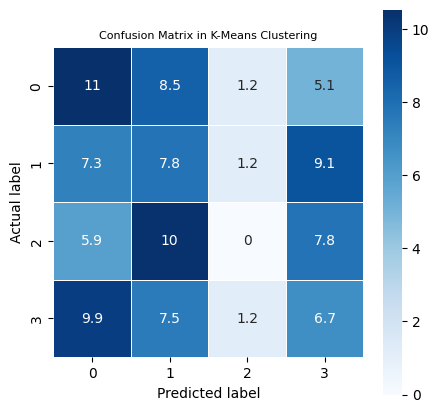

In [140]:
target = preprop['label']
X = pcad
le = LabelEncoder()
y = le.fit_transform(target)
print(y)
print(X.head())
model, yhat, clusters = train_kmeans(X, y)

In [141]:
clusters, yhat

(array([0, 1, 2, 3], dtype=int32), array([0, 0, 0, ..., 3, 3, 3], dtype=int32))

In [144]:
projected

array([[ -5.21849011,   5.13694028, -23.14361672],
       [ -3.4982441 ,   5.26698297, -21.73271227],
       [  1.40351524,   5.83205074, -20.30648924],
       ...,
       [ 45.28089795, -27.75798857,  -2.3863215 ],
       [ 43.42966   , -23.6109068 ,  -4.45333897],
       [ 43.39652892, -22.48731232,  -4.54377534]])

<ipython-input-145-b2500a57c6c9>:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('Accent', len(unique_labels))
<ipython-input-145-b2500a57c6c9>:18: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(projected[mask, 0], projected[mask, 1], projected[mask, 2],


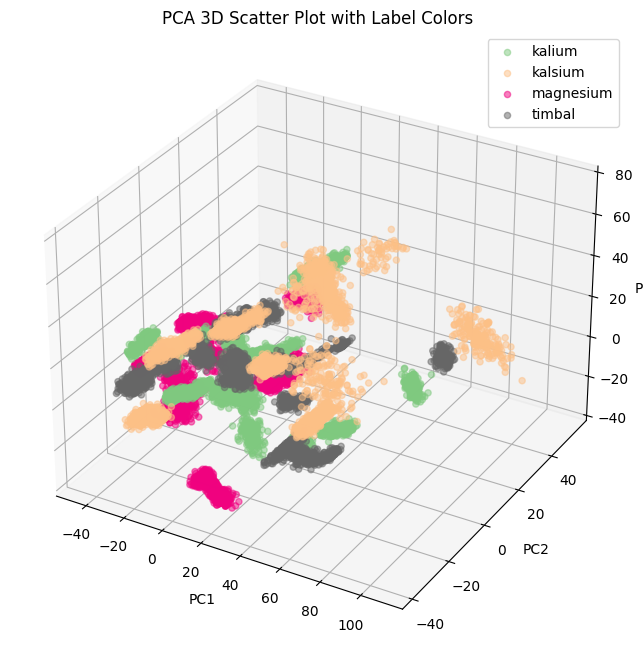

In [145]:
import matplotlib.pyplot as plt

# Create a list of unique labels
unique_labels = preprop['label'].unique().tolist()

# Create a color map based on the number of unique labels
cmap = plt.cm.get_cmap('Accent', len(unique_labels))

# Create a dictionary that maps labels to colors
label_colors = {label: cmap(i) for i, label in enumerate(unique_labels)}

# Create a 3D scatter plot with colors based on labels
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
label_comb = preprop['label']
for label in unique_labels:
    mask = label_comb == label
    ax.scatter(projected[mask, 0], projected[mask, 1], projected[mask, 2],
               c=label_colors[label], label=label, marker='o', alpha=0.5)

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('PCA 3D Scatter Plot with Label Colors')
ax.legend()

plt.show()

In [148]:
list(clusters)

[0, 1, 2, 3]

<ipython-input-150-b7b40ba9c9b3>:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('Accent', len(unique_labels))
<ipython-input-150-b7b40ba9c9b3>:18: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(projected[mask, 0], projected[mask, 1], projected[mask, 2],


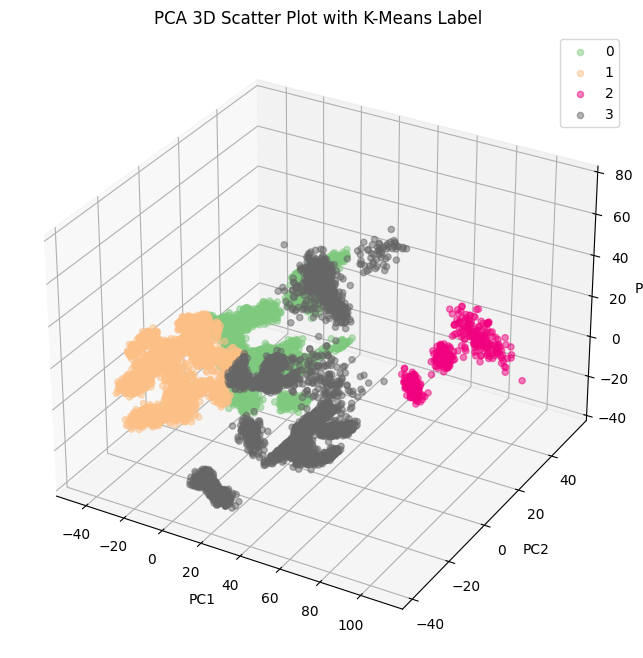

In [150]:
import matplotlib.pyplot as plt

# Create a list of unique labels
# unique_labels = preprop['label'].unique().tolist()
unique_labels = list(clusters)
# Create a color map based on the number of unique labels
cmap = plt.cm.get_cmap('Accent', len(unique_labels))

# Create a dictionary that maps labels to colors
label_colors = {label: cmap(i) for i, label in enumerate(unique_labels)}

# Create a 3D scatter plot with colors based on labels
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
label_comb = list(yhat)
for label in unique_labels:
    mask = label_comb == label
    ax.scatter(projected[mask, 0], projected[mask, 1], projected[mask, 2],
               c=label_colors[label], label=label, marker='o', alpha=0.5)

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('PCA 3D Scatter Plot with K-Means Label')
ax.legend()

plt.show()